In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Walmart.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
##Fetaure Engineering Process
df['weekday']=df['Date'].str.split('-').str[0]
df['month']=df['Date'].str.split('-').str[1]
df['year']=df['Date'].str.split('-').str[2]

In [6]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year weekday month  year  
0  211.096358         8.106  05    02  2010      05    02  2010  
1  211.242170         8.106  12    02  2010      12    02  2010  
2  211.289143         8.106  19    02  2010      19    02  2010  
3  211.319643         8.106  26    02  2010      26    02  2010  
4  211.350143         8.106  05    03  2010      05    03  2010

In [7]:
df.drop('Date',axis='columns',inplace=True)

In [8]:
df['weekday']=df['weekday'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [10]:
target = 'Weekly_Sales'
target

'Weekly_Sales'

In [11]:
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

In [12]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment Day Month  Year  weekday  month  year  
0         8.106  05    02  2010        5      2  2010  
1         8.106  12    02  2010       12      2  2010  
2         8.106  19    02  2010       19      2  2010  
3         8.106  26    02  2010       26      2  2010  
4         8.106  05    03  2010        5      3  2010

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   object 
 8   Month         6435 non-null   object 
 9   Year          6435 non-null   object 
 10  weekday       6435 non-null   int32  
 11  month         6435 non-null   int32  
 12  year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2), object(3)
memory usage: 578.3+ KB


In [14]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
Year               3
year               3
Month             12
month             12
Day               31
weekday           31
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [15]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment      weekday        month         year  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151    15.678322     6.447552  2010.965035  
std      39.356712      1.875885     8.755780     3.238308     0.797019  
min     126.064000      3.879000     1.000000     1.000000  2010.000000  
25%     131.735000      6.891000     8.000000     4.000000  2010.000000  
50%     182.616521      7.874000    16.000000     6.000000  2011.000000  
75%     212.743293      8.622000    23.000000     9.000000  2012.000000  
max     227.232807     14.313000    31.000000    12.000000  2012.000000

In [16]:
df.corr().describe().T

count      mean       std       min       25%           50%  \
Store          10.0  0.071607  0.358878 -0.335332 -0.016994  2.194601e-15   
Weekly_Sales   10.0  0.050876  0.351990 -0.335332 -0.070428 -1.789350e-02   
Holiday_Flag   10.0  0.092299  0.327757 -0.155091 -0.043127  5.480142e-03   
Temperature    10.0  0.150857  0.320432 -0.155091 -0.010251  8.271354e-02   
Fuel_Price     10.0  0.169618  0.392089 -0.170642 -0.040288  1.876816e-02   
CPI            10.0  0.050240  0.362273 -0.302020 -0.146140  2.611042e-04   
Unemployment   10.0  0.063398  0.362472 -0.302020 -0.088303 -8.489442e-03   
weekday        10.0  0.110221  0.313158 -0.017409  0.000671  1.079885e-02   
month          10.0  0.120581  0.328493 -0.194465 -0.009559  1.008576e-02   
year           10.0  0.141350  0.410608 -0.241813 -0.047181  3.202934e-03   

                   75%  max  
Store         0.045017  1.0  
Weekly_Sales  0.030034  1.0  
Holiday_Flag  0.042617  1.0  
Temperature   0.168911  1.0  
Fuel_Price    0.123742  1.0  
CPI           0.057342  1.0  
Unemployment  0.078608  1.0  
weekday       0.027798  1.0  
month         0.111283  1.0  
year          0.072164  1.0

<AxesSubplot:>

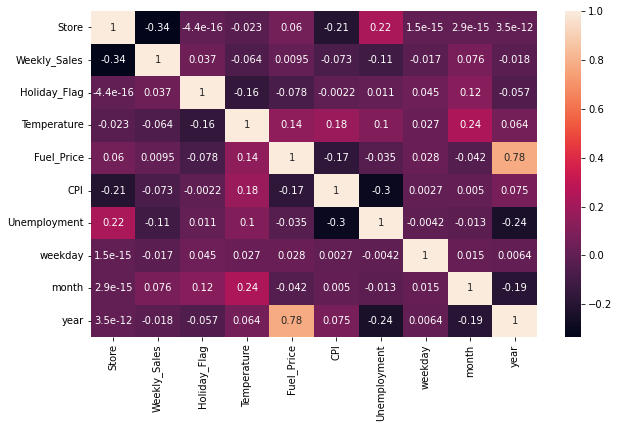

In [18]:
sns.heatmap(df.corr(),annot=True)

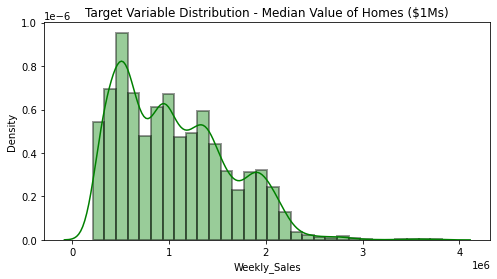

In [19]:
#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [22]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 8 categorical features.


                               Visualising Categorical Features:                                


ValueError: num must be 1 <= num <= 3, not 4

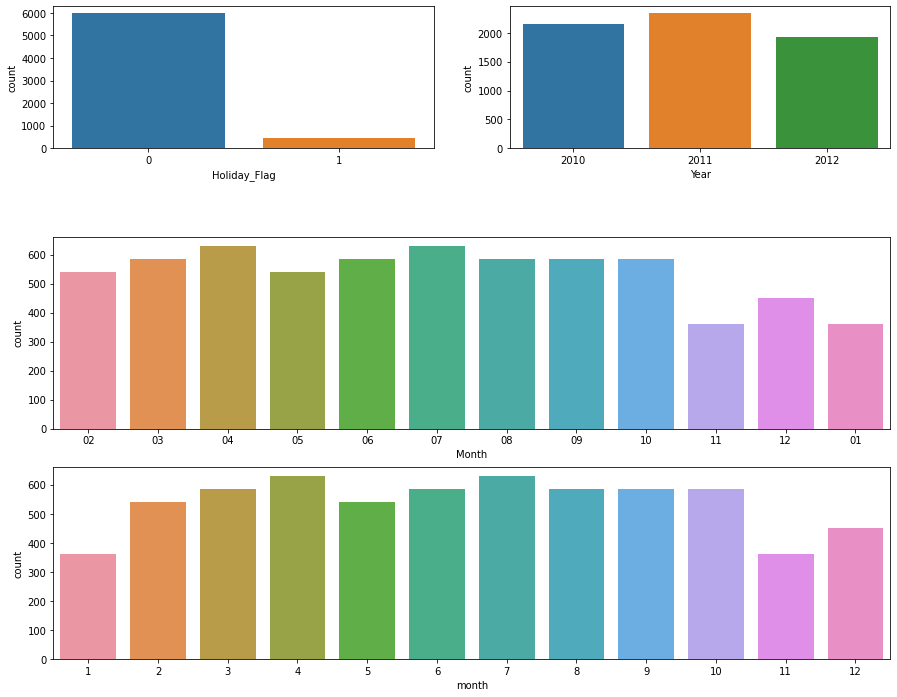

In [23]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


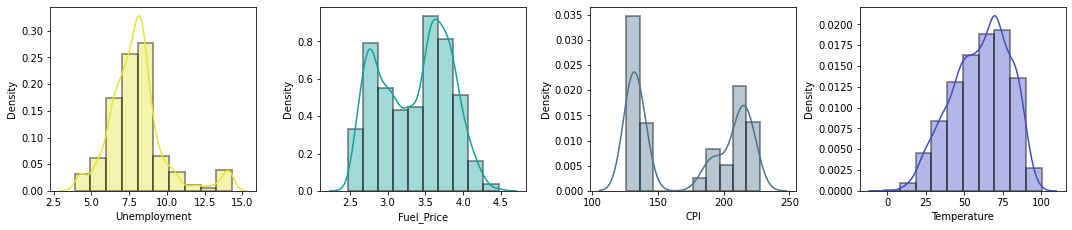

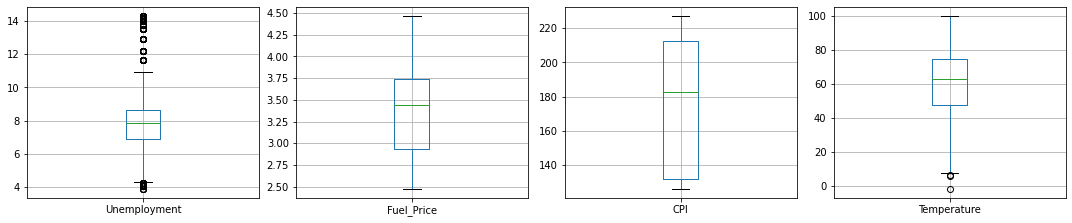

In [24]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

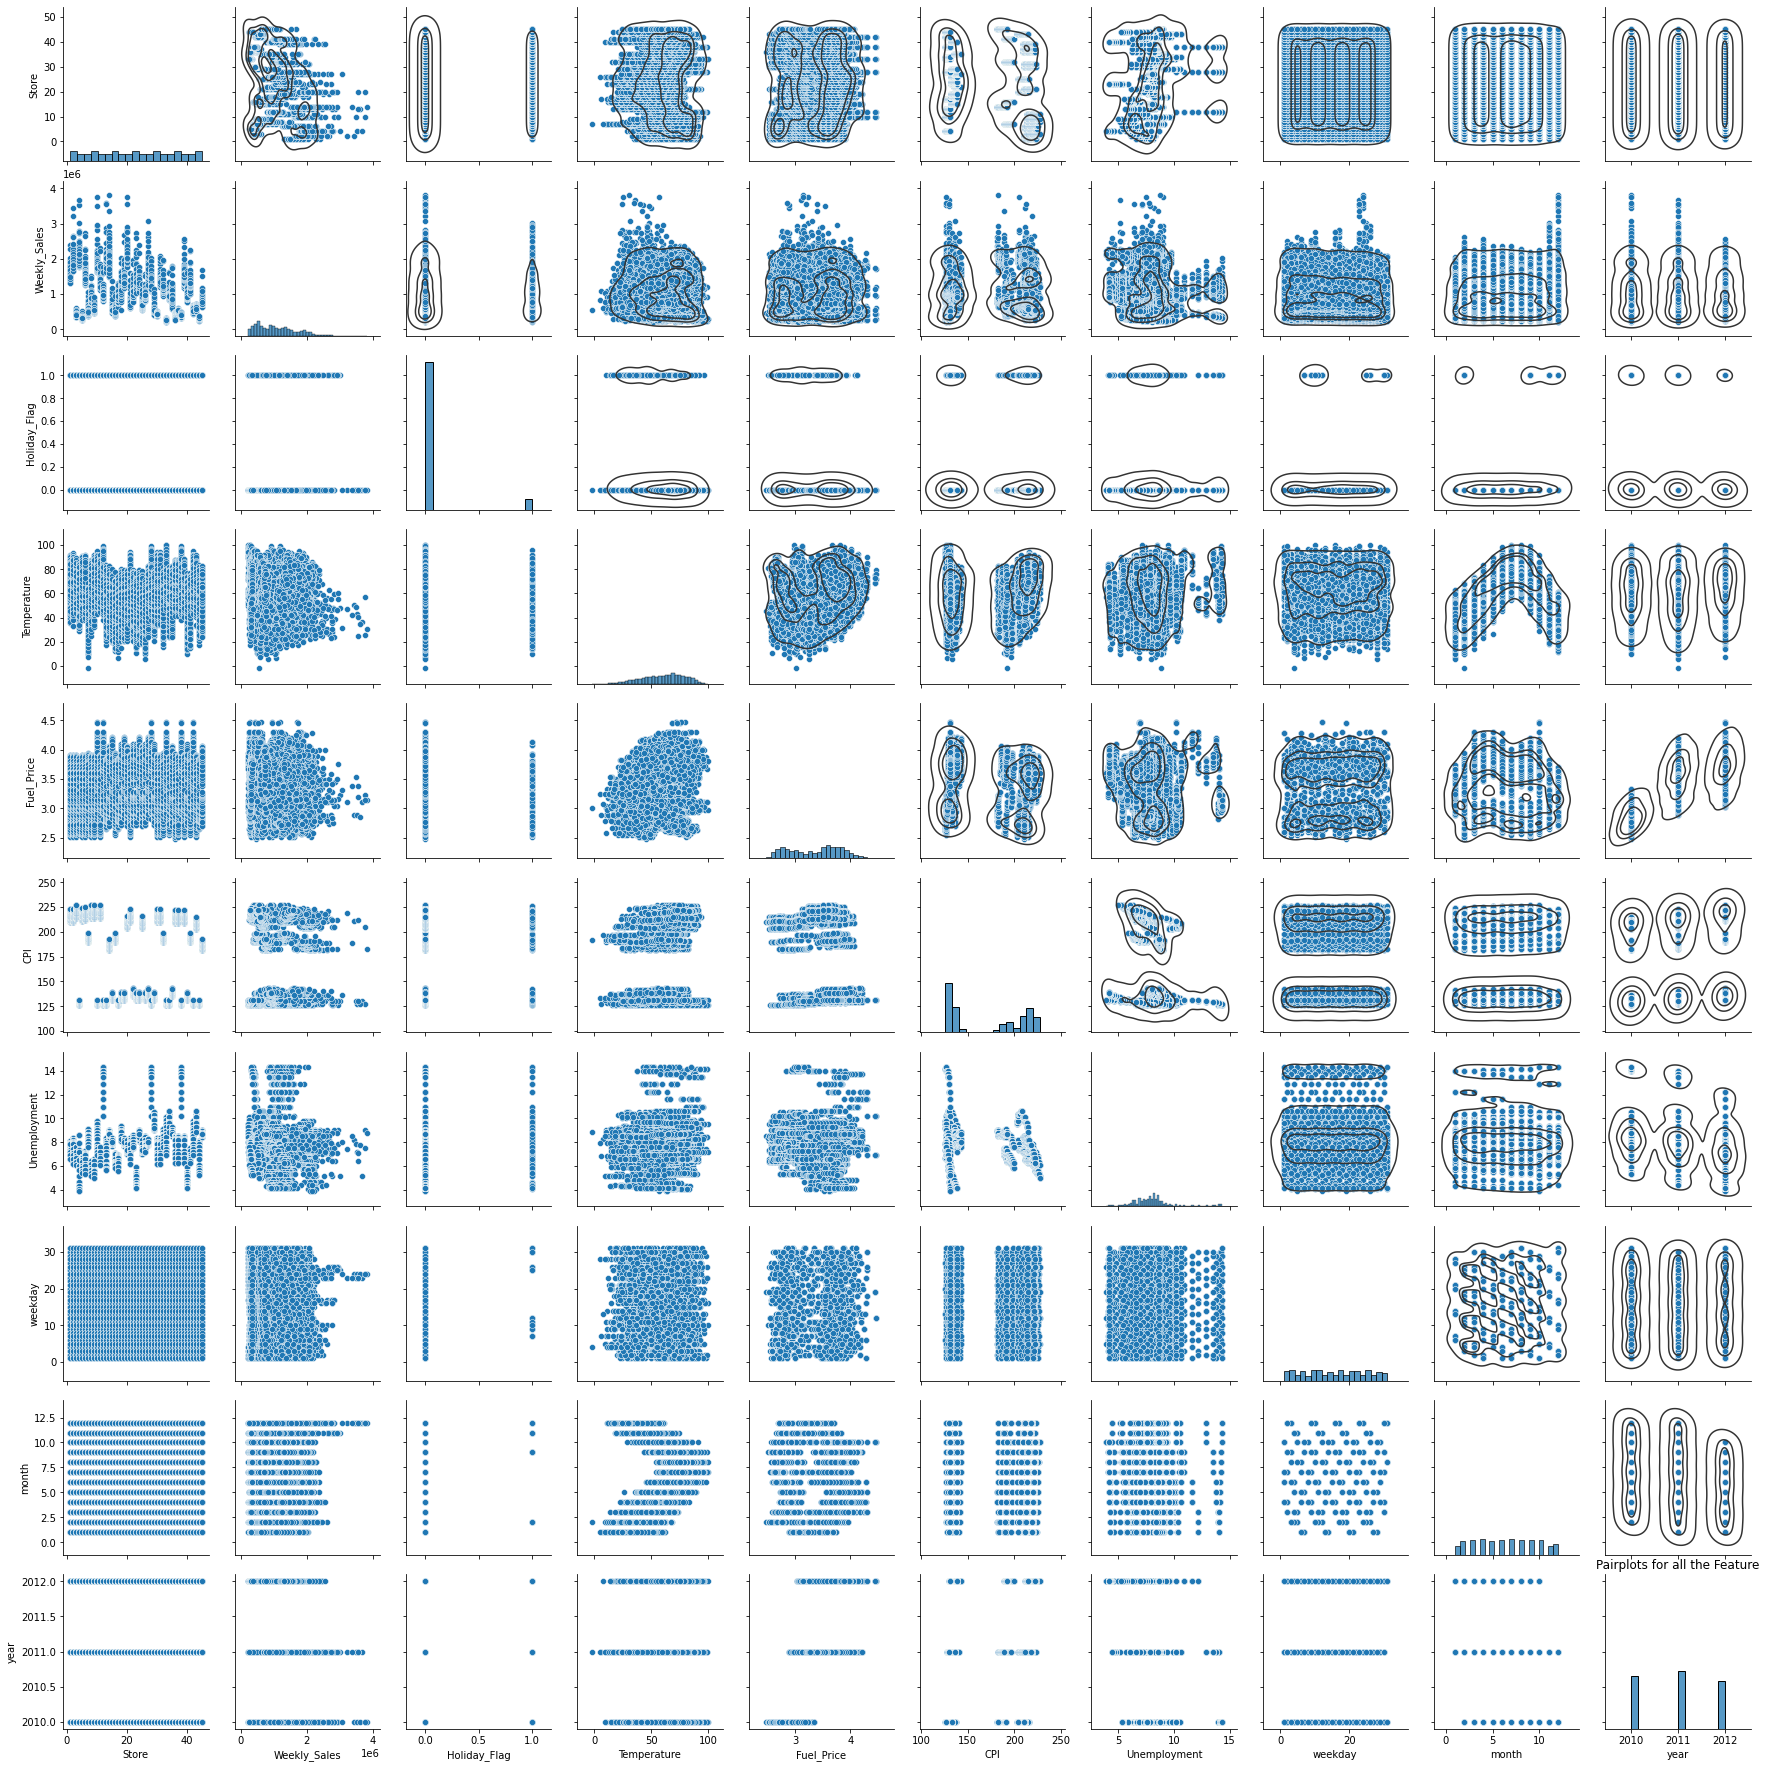

In [25]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [26]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [27]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
Day                           0         0.0
Month                         0         0.0
Year                          0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [28]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
Year
year
Month
month
Day
weekday
Store


(6435, 136)

In [29]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    1643690.90             0        42.31       2.572  211.096358   
1    1641957.44             1        38.51       2.548  211.242170   
2    1611968.17             0        39.93       2.514  211.289143   
3    1409727.59             0        46.63       2.561  211.319643   
4    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Year_2011  Year_2012  year_2011  year_2012  ...  Store_36  \
0         8.106          0          0          0          0  ...         0   
1         8.106          0          0          0          0  ...         0   
2         8.106          0          0          0          0  ...         0   
3         8.106          0          0          0          0  ...         0   
4         8.106          0          0          0          0  ...         0   

   Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   Store_44  Store_45  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 136 columns]


Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


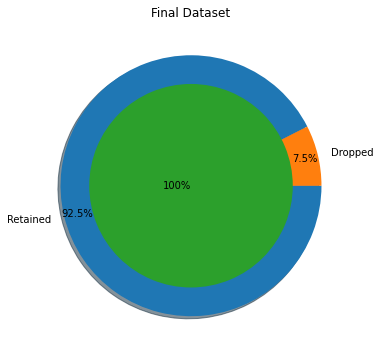


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [30]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [31]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 135) (5953,) 
Training set  --->  (4762, 135) (4762,) 
Testing set   --->  (1191, 135)  (1191,)


In [32]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


Holiday_Flag   Temperature    Fuel_Price           CPI  Unemployment  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -1.741339e-16 -1.494674e-16 -3.367039e-16 -2.799804e-16 -4.039888e-16   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -2.742012e-01 -2.961575e+00 -1.871814e+00 -1.248731e+00 -2.762670e+00   
25%   -2.742012e-01 -7.314248e-01 -9.886990e-01 -1.076949e+00 -6.783836e-01   
50%   -2.742012e-01  1.062547e-01  1.663112e-01  3.842133e-01  9.596435e-02   
75%   -2.742012e-01  7.731979e-01  8.427860e-01  9.933828e-01  6.138095e-01   
max    3.646958e+00  2.170008e+00  2.469806e+00  1.340791e+00  2.575491e+00   

          Year_2011     Year_2012     year_2011     year_2012      Month_02  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean   3.964583e-16  3.839385e-16  3.964583e-16  3.839385e-16  4.569587e-18   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -7.526270e-01 -6.371530e-01 -7.526270e-01 -6.371530e-01 -2.982532e-01   
25%   -7.526270e-01 -6.371530e-01 -7.526270e-01 -6.371530e-01 -2.982532e-01   
50%   -7.526270e-01 -6.371530e-01 -7.526270e-01 -6.371530e-01 -2.982532e-01   
75%    1.328679e+00  1.569482e+00  1.328679e+00  1.569482e+00 -2.982532e-01   
max    1.328679e+00  1.569482e+00  1.328679e+00  1.569482e+00  3.352856e+00   

       ...      Store_36      Store_37      Store_38      Store_39  \
count  ...  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean   ... -4.515031e-16 -6.241216e-16 -1.086772e-15 -6.947287e-16   
std    ...  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
25%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
50%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
75%    ... -1.573123e-01 -1.587085e-01 -4.351484e-02 -1.580118e-01   
max    ...  6.356783e+00  6.300861e+00  2.298067e+01  6.328643e+00   

           Store_40      Store_41      Store_42      Store_43      Store_44  \
count  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03  4.762000e+03   
mean  -2.611192e-17  3.944649e-16 -1.004738e-15  5.259687e-16  6.589880e-16   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
25%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
50%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
75%   -1.307162e-01 -1.537717e-01 -1.573123e-01 -1.628322e-01 -1.551967e-01   
max    7.650163e+00  6.503146e+00  6.356783e+00  6.141290e+00  6.443435e+00   

           Store_45  
count  4.762000e+03  
mean   6.687683e-17  
std    1.000105e+00  
min   -1.523346e-01  
25%   -1.523346e-01  
50%   -1.523346e-01  
75%   -1.523346e-01  
max    6.564495e+00  

[8 rows x 135 columns]


                                          Standardardization on Testing set                                          


Holiday_Flag  Temperature   Fuel_Price          CPI  Unemployment  \
count   1191.000000  1191.000000  1191.000000  1191.000000   1191.000000   
mean       0.005646     0.044406     0.075113     0.021041     -0.050953   
std        1.009885     1.000220     0.971917     1.004644      1.010206   
min       -0.274201    -2.857425    -1.780457    -1.248731     -2.762670   
25%       -0.274201    -0.657516    -0.852751    -1.077025     -0.699355   
50%       -0.274201     0.187351     0.298996     0.393492      0.058860   
75%       -0.274201     0.818764     0.844961     1.019967      0.611390   
max        3.646958     2.035481     2.469806     1.345814      2.575491   

         Year_2011    Year_2012    year_2011    year_2012     Month_02  ...  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000  ...   
mean      0.052984     0.065042     0.052984     0.065042     0.026699  ...   
std       1.014188     1.028250     1.014188     1.028250     1.040072  ...   
min      -0.752627    -0.637153    -0.752627    -0.637153    -0.298253  ...   
25%      -0.752627    -0.637153    -0.752627    -0.637153    -0.298253  ...   
50%      -0.752627    -0.637153    -0.752627    -0.637153    -0.298253  ...   
75%       1.328679     1.569482     1.328679     1.569482    -0.298253  ...   
max       1.328679     1.569482     1.328679     1.569482     3.352856  ...   

          Store_36     Store_37     Store_38     Store_39     Store_40  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000   
mean     -0.004168    -0.017693     0.111140    -0.010959    -0.000055   
std       0.987401     0.944330     1.881448     0.965939     1.000214   
min      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
25%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
50%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
75%      -0.157312    -0.158708    -0.043515    -0.158012    -0.130716   
max       6.356783     6.300861    22.980668     6.328643     7.650163   

          Store_41     Store_42     Store_43     Store_44     Store_45  
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000  
mean      0.030677    -0.004168    -0.056970     0.016556     0.045053  
std       1.093088     0.987401     0.810380     1.051077     1.134875  
min      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
25%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
50%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
75%      -0.153772    -0.157312    -0.162832    -0.155197    -0.152335  
max       6.503146     6.356783     6.141290     6.443435     6.564495  

[8 rows x 135 columns]

                                       Correlation Matrix                                       


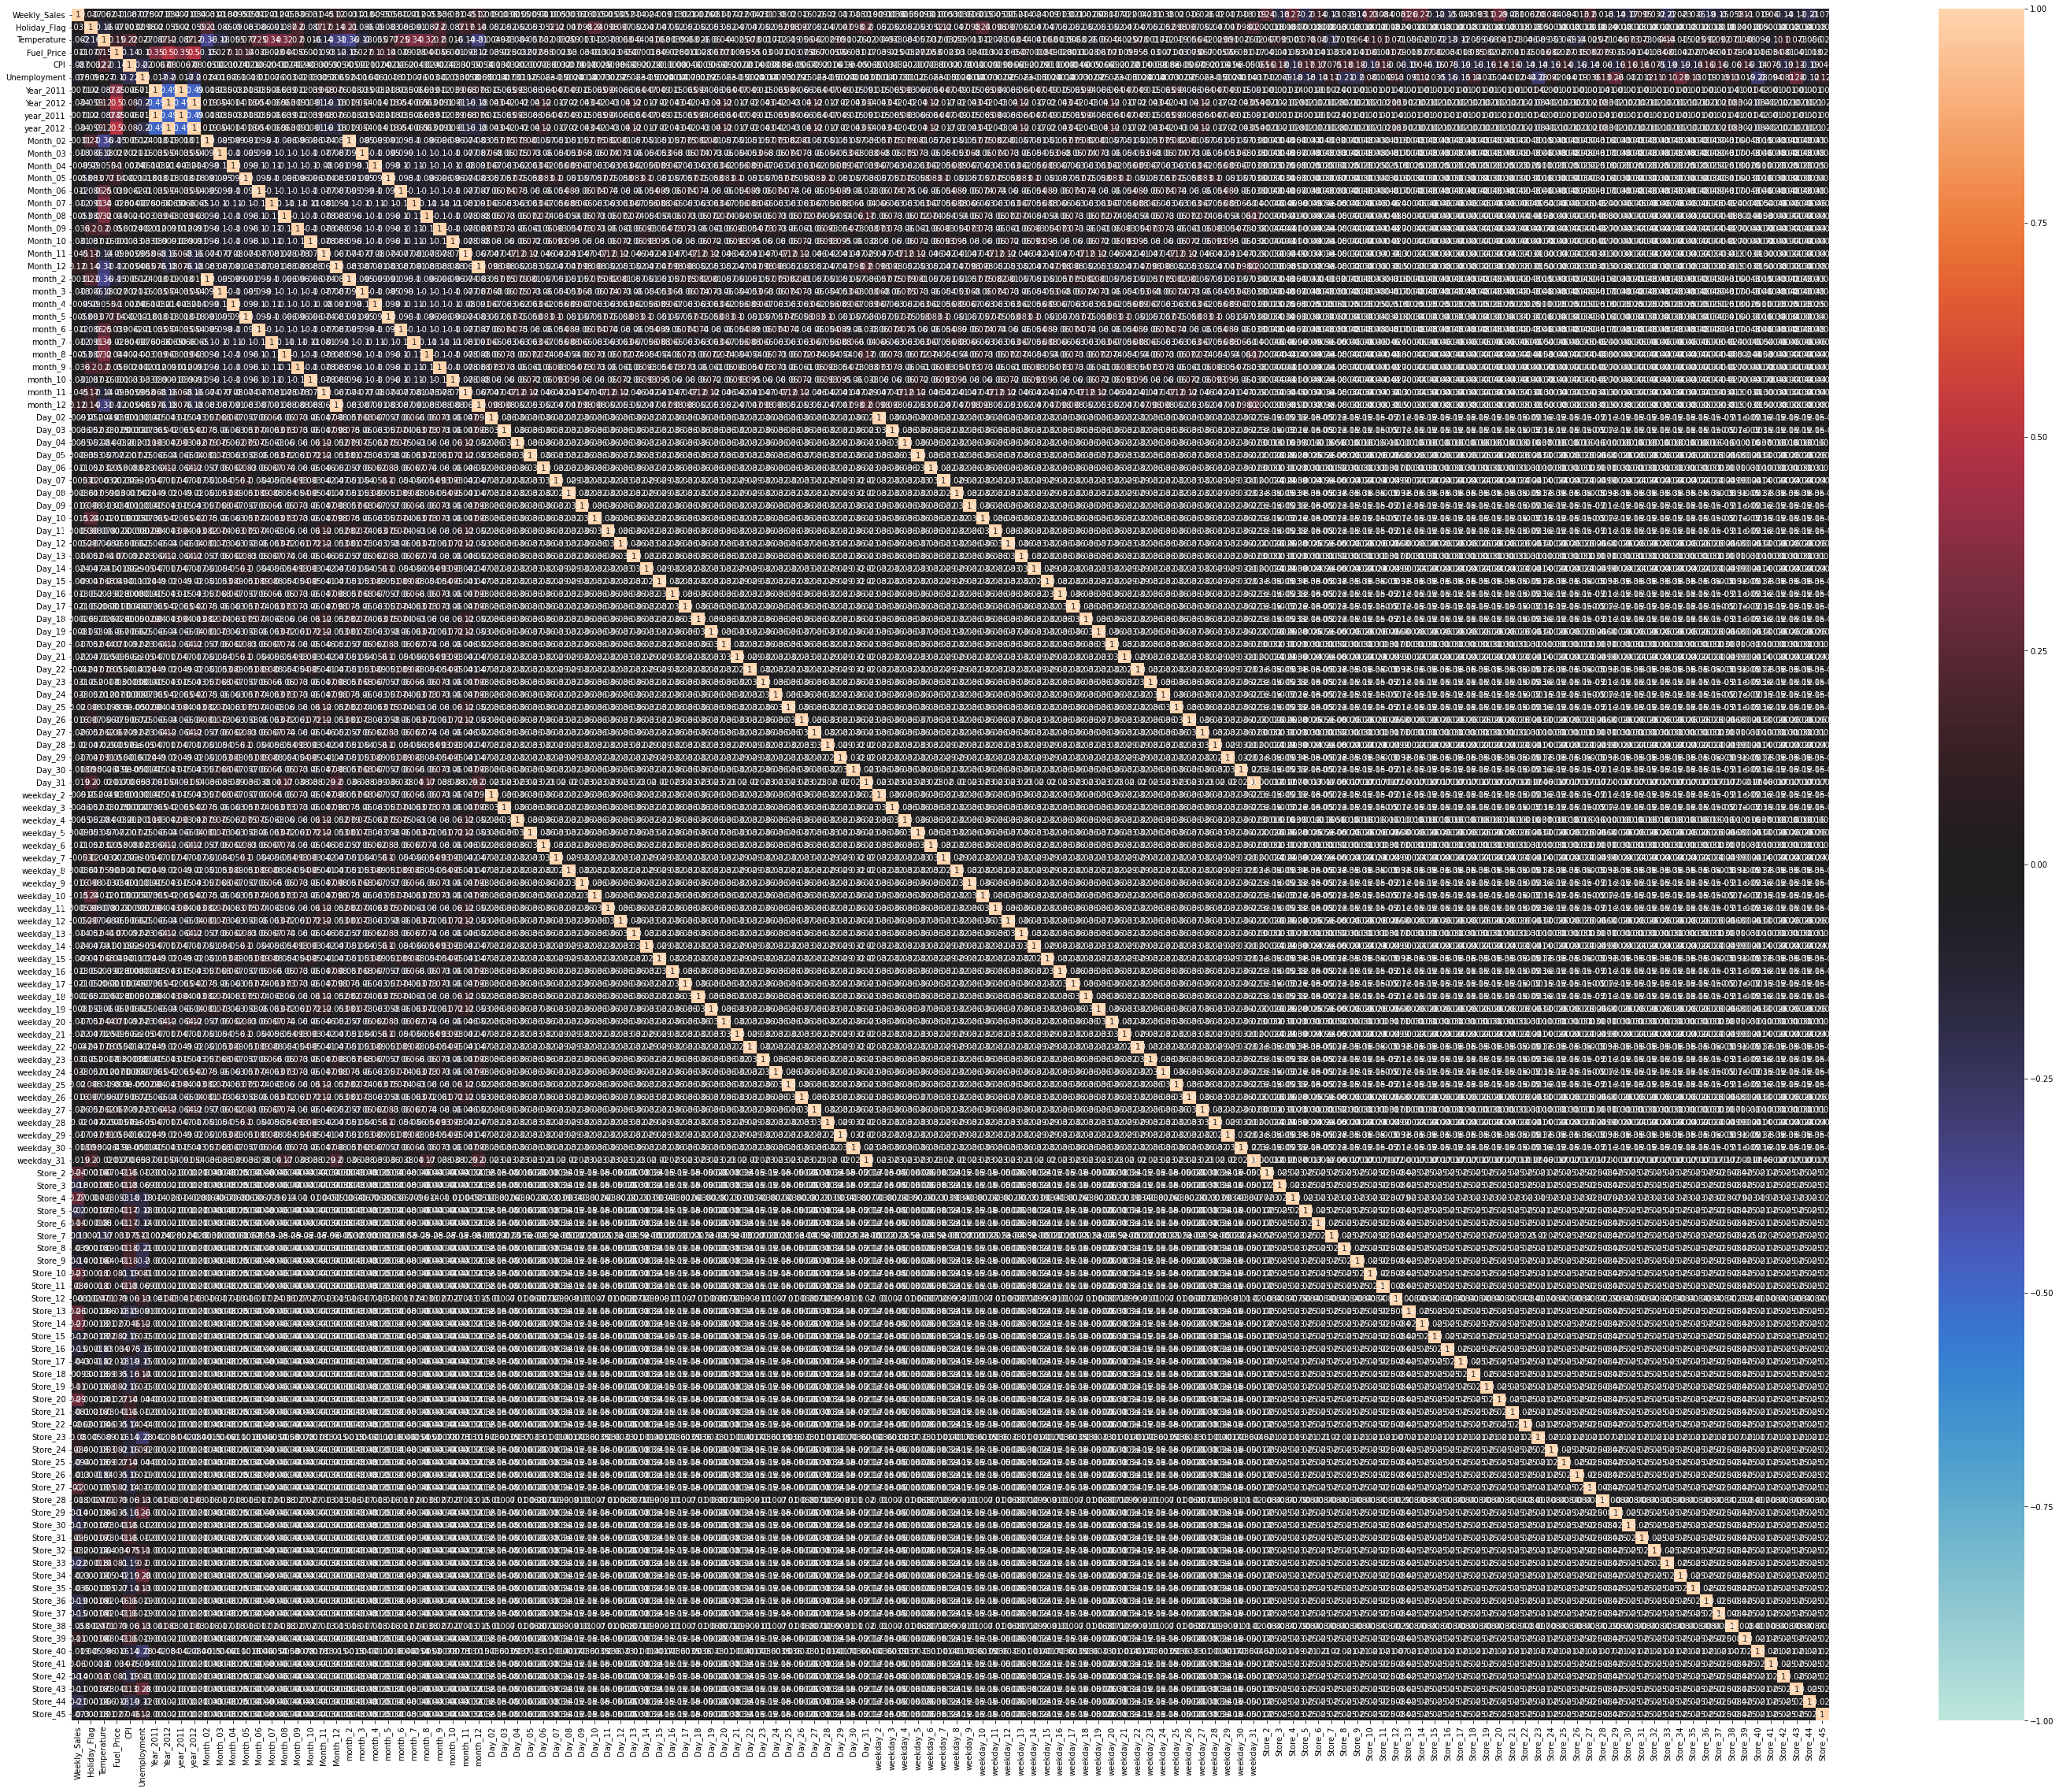

In [33]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[50,40])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [34]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     862.0
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:55:31   Log-Likelihood:                -62980.
No. Observations:                4762   AIC:                         1.261e+05
Df Residuals:                    4669   BIC:                         1.267e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.048e+06   1966.234    532.813      0.000    1.04e+06    1.05e+06
Holiday_Flag  1.853e+04   2928.106      6.328      0.000    1.28e+04    2.43e+04
Temperature   1.631e+04   7304.144      2.233      0.026    1990.232    3.06e+04
Fuel_Price    1.557e+04   7372.162      2.112      0.035    1119.987       3e+04
CPI           1.709e+05   6.93e+04      2.465      0.014     3.5e+04    3.07e+05
Unemployment -5.313e+04   6872.975     -7.730      0.000   -6.66e+04   -3.97e+04
Year_2011     5.811e+15   1.99e+16      0.293      0.770   -3.31e+16    4.48e+16
Year_2012    -3.192e+15   1.09e+16     -0.293      0.770   -2.46e+16    1.82e+16
year_2011    -5.811e+15   1.99e+16     -0.293      0.770   -4.48e+16    3.31e+16
year_2012     3.192e+15   1.09e+16      0.293      0.770   -1.82e+16    2.46e+16
Month_02     -1.683e+15   5.75e+15     -0.293      0.770    -1.3e+16    9.59e+15
Month_03     -1.749e+16   5.98e+16     -0.293      0.770   -1.35e+17    9.97e+16
Month_04      -3.99e+16   1.36e+17     -0.293      0.770   -3.07e+17    2.27e+17
Month_05      -1.01e+16   3.45e+16     -0.293      0.770   -7.77e+16    5.76e+16
Month_06     -1.117e+15   3.82e+15     -0.293      0.770    -8.6e+15    6.37e+15
Month_07      6.033e+15   2.06e+16      0.293      0.770   -3.44e+16    4.65e+16
Month_08      1.022e+16   3.49e+16      0.293      0.770   -5.83e+16    7.87e+16
Month_09     -1.933e+16   6.61e+16     -0.293      0.770   -1.49e+17     1.1e+17
Month_10      5.822e+16   1.99e+17      0.293      0.770   -3.32e+17    4.48e+17
Month_11       1.74e+17   5.95e+17      0.293      0.770   -9.92e+17    1.34e+18
Month_12     -2.871e+16   9.82e+16     -0.293      0.770   -2.21e+17    1.64e+17
month_2       1.683e+15   5.75e+15      0.293      0.770   -9.59e+15     1.3e+16
month_3       1.749e+16   5.98e+16      0.293      0.770   -9.97e+16    1.35e+17
month_4        3.99e+16   1.36e+17      0.293      0.770   -2.27e+17    3.07e+17
month_5        1.01e+16   3.45e+16      0.293      0.770   -5.76e+16    7.77e+16
month_6       1.117e+15   3.82e+15      0.293      0.770   -6.37e+15     8.6e+15
month_7      -6.033e+15   2.06e+16     -0.293      0.770   -4.65e+16    3.44e+16
month_8      -1.022e+16   3.49e+16     -0.293      0.770   -7.87e+16    5.83e+16
month_9       1.933e+16   6.61e+16      0.293      0.770    -1.1e+17    1.49e+17
month_10     -5.822e+16   1.99e+17     -0.293      0.770   -4.48e+17    3.32e+17
month_11      -1.74e+17   5.95e+17     -0.293      0.770   -1.34e+18    9.92e+17
month_12      2.871e+16   9.82e+16      0.293      0.770   -1.64e+17    2.21e+17
Day_02        1.005e+16   3.43e+16      0.293      0.770   -5.73e+16    7.74e+16
Day_03       -6.014e+15   2.06e+16     -0.293      0.770   -4.63e+16    3.43e+16
Day_04       -1.846e+16   6.31e+16     -0.293      0.770   -1.42e+17    1.05e+17
Day_0

Dropped Features -->  ['weekday_8', 'weekday_9', 'weekday_7', 'weekday_10', 'weekday_6', 'weekday_11', 'weekday_5', 'weekday_12', 'weekday_4', 'weekday_13', 'weekday_3', 'weekday_14', 'weekday_2', 'weekday_15', 'Day_31', 'weekday_16', 'Day_30', 'weekday_17', 'Day_29', 'weekday_18', 'Day_28', 'weekday_19', 'Day_27', 'weekday_20', 'Day_26', 'weekday_21', 'Day_25', 'weekday_22', 'Day_24', 'weekday_23', 'month_6', 'Month_11', 'month_10', 'month_8', 'month_3', 'month_9', 'Month_12', 'Month_05', 'Month_07', 'Year_2011', 'Month_04', 'Year_2012', 'month_2', 'CPI', 'year_2012', 'Temperature', 'Unemployment', 'Month_03', 'Day_10', 'Store_30', 'month_12', 'Day_19', 'Month_10', 'Fuel_Price', 'Store_43', 'Holiday_Flag', 'Day_13', 'Month_06', 'Store_29', 'Month_08', 'Day_04', 'month_4', 'Store_25', 'Day_16', 'month_5', 'Store_8', 'month_11', 'Day_12', 'Store_22', 'Month_09', 'Day_23', 'Store_24', 'month_7', 'year_2011', 'Month_02', 'Store_27', 'Day_02', 'Store_10', 'Day_05', 'Store_11', 'Store_32', 

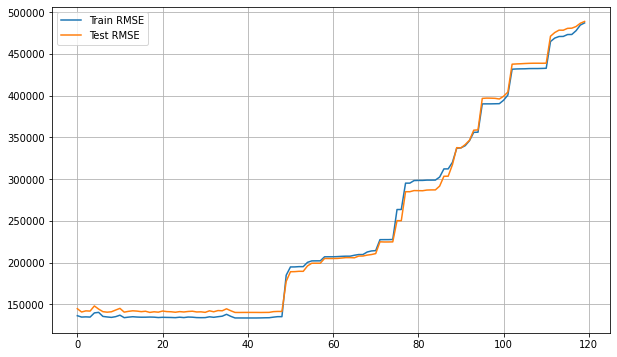

In [35]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]


DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

print('Dropped Features --> ',DROP)


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

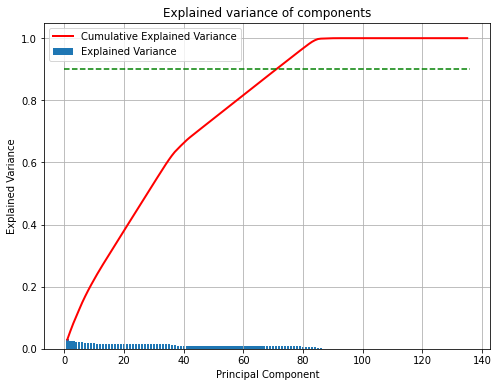

In [36]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

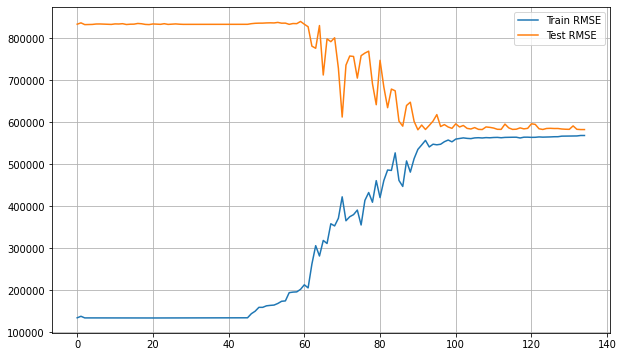

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()


In [38]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-28)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

234554.3505240803
244463.81886227467


In [45]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()
    
    
    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


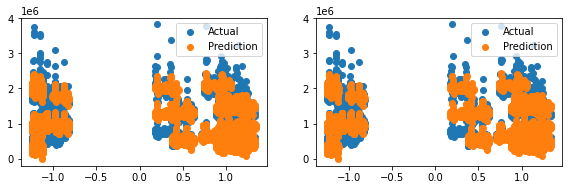



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8300053100875174
Residual Sum of Squares (RSS) on Training set  ---> 261984969831619.62
Mean Squared Error (MSE) on Training set       ---> 55015743349.773125
Root Mean Squared Error (RMSE) on Training set ---> 234554.3505240803

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8252802454761817
Residual Sum of Squares (RSS) on Training set  ---> 71177207450677.9
Mean Squared Error (MSE) on Training set       ---> 59762558732.727036
Root Mean Squared Error (RMSE) on Training set ---> 244463.8188622747

--------------------Residual Plots--------------------


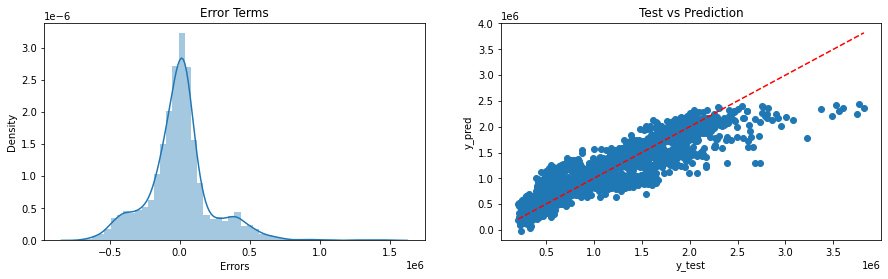

In [46]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


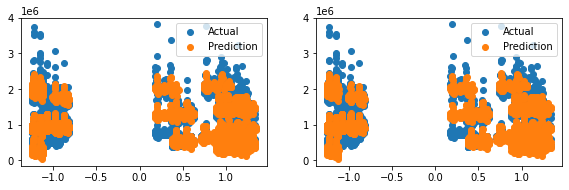



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8308416828388568
Residual Sum of Squares (RSS) on Training set  ---> 260696005510790.28
Mean Squared Error (MSE) on Training set       ---> 54745066255.940834
Root Mean Squared Error (RMSE) on Training set ---> 233976.63613262936

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8264919208888415
Residual Sum of Squares (RSS) on Training set  ---> 70683595995895.23
Mean Squared Error (MSE) on Training set       ---> 59348107469.265526
Root Mean Squared Error (RMSE) on Training set ---> 243614.67006168887

--------------------Residual Plots--------------------


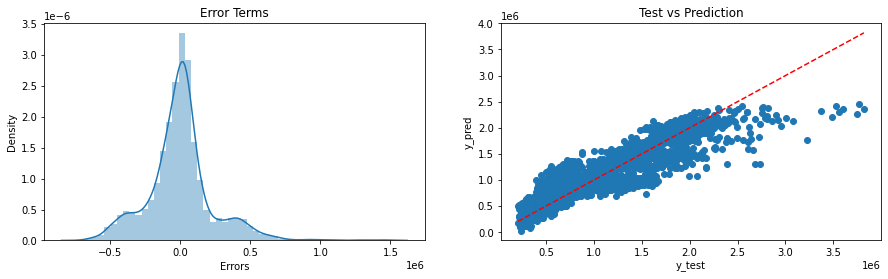

In [47]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


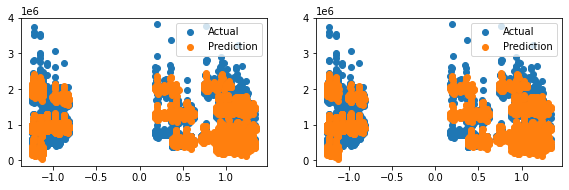



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8308418393138765
Residual Sum of Squares (RSS) on Training set  ---> 260695764361473.7
Mean Squared Error (MSE) on Training set       ---> 54745015615.59715
Root Mean Squared Error (RMSE) on Training set ---> 233976.5279159368

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8264869475729599
Residual Sum of Squares (RSS) on Training set  ---> 70685622021728.36
Mean Squared Error (MSE) on Training set       ---> 59349808582.47553
Root Mean Squared Error (RMSE) on Training set ---> 243618.16143809052

--------------------Residual Plots--------------------


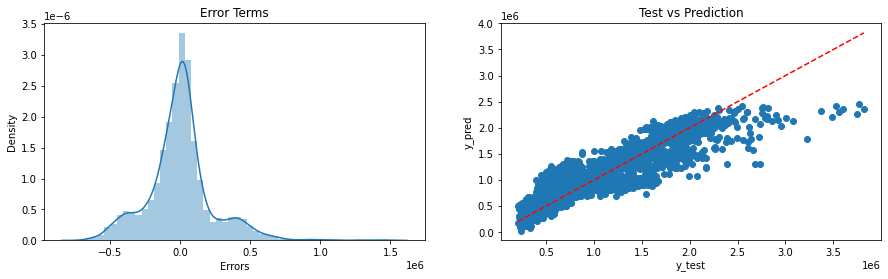

In [48]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


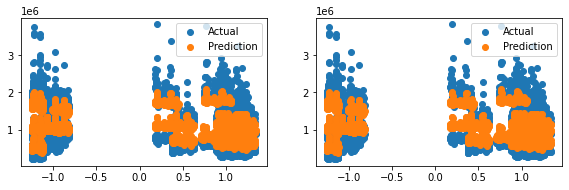



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6844482695403147
Residual Sum of Squares (RSS) on Training set  ---> 486308193669793.2
Mean Squared Error (MSE) on Training set       ---> 102122678217.09222
Root Mean Squared Error (RMSE) on Training set ---> 319566.39093792735

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6828659899239911
Residual Sum of Squares (RSS) on Training set  ---> 129193824054785.36
Mean Squared Error (MSE) on Training set       ---> 108475083169.42516
Root Mean Squared Error (RMSE) on Training set ---> 329355.55736836314

--------------------Residual Plots--------------------


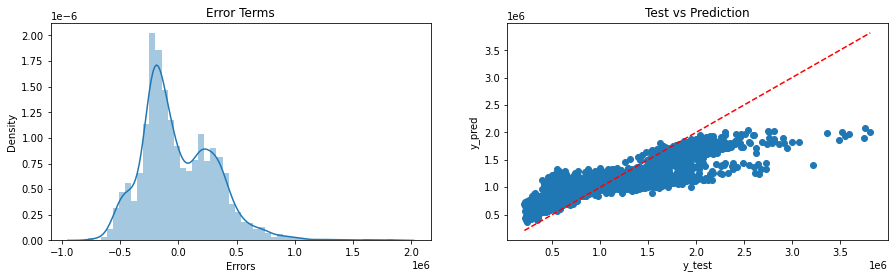

In [49]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 2.46086617e+05  1.53172407e+17  2.23629398e+16 -1.53172407e+17
 -2.23629398e+16 -3.52004176e+16  1.44238013e+18 -5.49640639e+17
  1.34327344e+18  1.07265845e+18 -1.67962708e+17  5.05900841e+18
  1.98657657e+17  1.37293785e+18 -1.77467225e+17  3.03265949e+17
  3.52004176e+16 -1.44238013e+18  5.49640639e+17 -1.34327344e+18
 -1.07265845e+18  1.67962708e+17 -5.05900841e+18 -1.98657657e+17
 -1.37293785e+18  1.77467225e+17 -3.03265949e+17  6.29835613e+17
 -2.11826171e+17 -4.24464664e+17 -8.82589936e+16  6.60285216e+17
  4.98923951e+17 -3.32183850e+17  1.86699464e+17 -2.05916259e+17
  1.06161837e+18  1.17603471e+18  7.79040467e+17  6.03110841e+17
 -5.52763949e+16  4.92852154e+17  1.47178782e+18 -9.53337775e+17
  1.47647014e+18  1.54985055e+18 -8.19277607e+17  2.95434869e+17
  2.43316430e+17  6.43406213e+17 -2.19733963e+

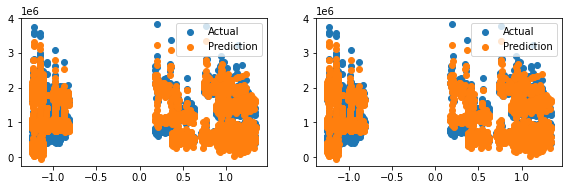



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8736052621601746
Residual Sum of Squares (RSS) on Training set  ---> 194791505528141.94
Mean Squared Error (MSE) on Training set       ---> 40905398052.948746
Root Mean Squared Error (RMSE) on Training set ---> 202250.82954823383

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -2.498895386003495e+20
Residual Sum of Squares (RSS) on Training set  ---> 1.0179981981537506e+35
Mean Squared Error (MSE) on Training set       ---> 8.547423997932415e+31
Root Mean Squared Error (RMSE) on Training set ---> 9245227957131406.0

--------------------Residual Plots--------------------


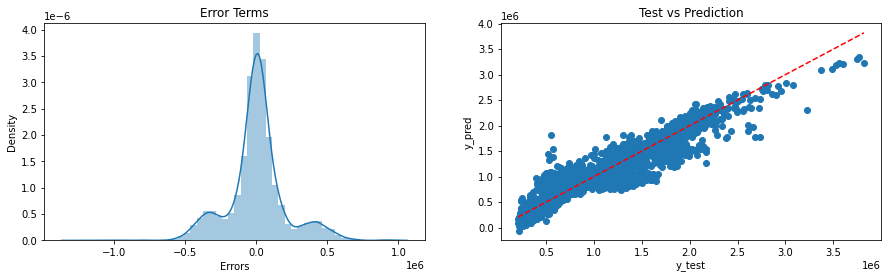

In [51]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [52]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

Train-R2       Test-R2     Train-RSS  \
Multiple Linear Regression (MLR)  0.830005  8.252802e-01  2.619850e+14   
Ridge Linear Regression (RLR)     0.830842  8.264919e-01  2.606960e+14   
Lasso Linear Regression (LLR)     0.830842  8.264869e-01  2.606958e+14   
Elastic-Net Regression (ENR)      0.684448  6.828660e-01  4.863082e+14   
Polynomial Regression (PNR)       0.873605 -2.498895e+20  1.947915e+14   

                                      Test-RSS     Train-MSE      Test-MSE  \
Multiple Linear Regression (MLR)  7.117721e+13  5.501574e+10  5.976256e+10   
Ridge Linear Regression (RLR)     7.068360e+13  5.474507e+10  5.934811e+10   
Lasso Linear Regression (LLR)     7.068562e+13  5.474502e+10  5.934981e+10   
Elastic-Net Regression (ENR)      1.291938e+14  1.021227e+11  1.084751e+11   
Polynomial Regression (PNR)       1.017998e+35  4.090540e+10  8.547424e+31   

                                     Train-RMSE     Test-RMSE  
Multiple Linear Regression (MLR)  234554.350524  2.444638e+05  
Ridge Linear Regression (RLR)     233976.636133  2.436147e+05  
Lasso Linear Regression (LLR)     233976.527916  2.436182e+05  
Elastic-Net Regression (ENR)      319566.390938  3.293556e+05  
Polynomial Regression (PNR)       202250.829548  9.245228e+15

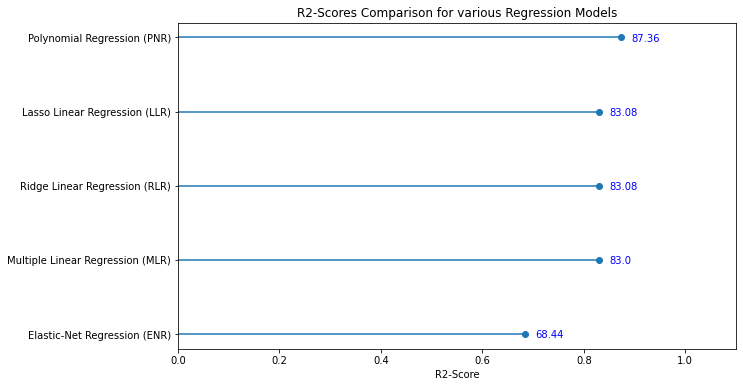

In [53]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

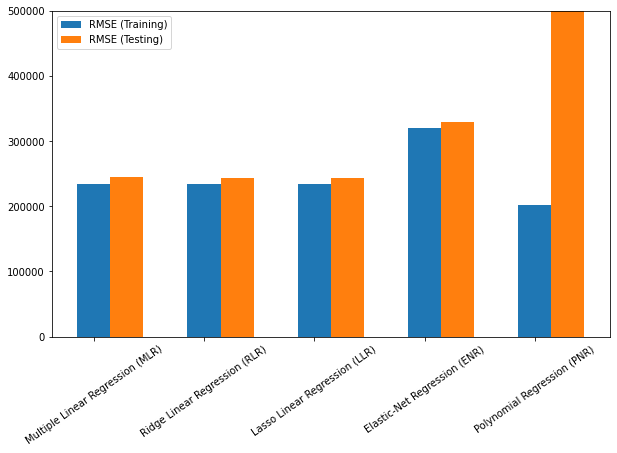

In [54]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()

In [55]:
df.shape

(5953, 136)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Columns: 136 entries, Weekly_Sales to Store_45
dtypes: float64(5), uint8(131)
memory usage: 994.2 KB


In [57]:
df.dtypes

Weekly_Sales    float64
Holiday_Flag      uint8
Temperature     float64
Fuel_Price      float64
CPI             float64
                 ...   
Store_41          uint8
Store_42          uint8
Store_43          uint8
Store_44          uint8
Store_45          uint8
Length: 136, dtype: object

In [60]:
df.min()

Weekly_Sales    209986.250
Holiday_Flag         0.000
Temperature          5.540
Fuel_Price           2.472
CPI                126.064
                   ...    
Store_41             0.000
Store_42             0.000
Store_43             0.000
Store_44             0.000
Store_45             0.000
Length: 136, dtype: float64

In [61]:
df.max()

Weekly_Sales    3.818686e+06
Holiday_Flag    1.000000e+00
Temperature     1.001400e+02
Fuel_Price      4.468000e+00
CPI             2.272328e+02
                    ...     
Store_41        1.000000e+00
Store_42        1.000000e+00
Store_43        1.000000e+00
Store_44        1.000000e+00
Store_45        1.000000e+00
Length: 136, dtype: float64

In [62]:
df.skew()

Weekly_Sales    0.676678
Holiday_Flag    3.364945
Temperature    -0.347232
Fuel_Price     -0.081834
CPI            -0.088153
                  ...   
Store_41        6.218800
Store_42        6.218800
Store_43        6.218800
Store_44        6.218800
Store_45        6.218800
Length: 136, dtype: float64

In [63]:
df.mode()

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0        209986.25           0.0        67.87       3.638  130.683000   
1        213538.32           NaN          NaN         NaN  130.701290   
2        215359.21           NaN          NaN         NaN  130.719581   
3        219804.85           NaN          NaN         NaN  130.719633   
4        220060.35           NaN          NaN         NaN  130.737871   
...            ...           ...          ...         ...         ...   
5948    3595903.20           NaN          NaN         NaN         NaN   
5949    3676388.98           NaN          NaN         NaN         NaN   
5950    3749057.69           NaN          NaN         NaN         NaN   
5951    3766687.43           NaN          NaN         NaN         NaN   
5952    3818686.45           NaN          NaN         NaN         NaN   

      Unemployment  Year_2011  Year_2012  year_2011  year_2012  ...  Store_36  \
0            8.099        0.0        0.0        0.0        0.0  ...       0.0   
1              NaN        NaN        NaN        NaN        NaN  ...       NaN   
2              NaN        NaN        NaN        NaN        NaN  ...       NaN   
3              NaN        NaN        NaN        NaN        NaN  ...       NaN   
4              NaN        NaN        NaN        NaN        NaN  ...       NaN   
...            ...        ...        ...        ...        ...  ...       ...   
5948           NaN        NaN        NaN        NaN        NaN  ...       NaN   
5949           NaN        NaN        NaN        NaN        NaN  ...       NaN   
5950           NaN        NaN        NaN        NaN        NaN  ...       NaN   
5951           NaN        NaN        NaN        NaN        NaN  ...       NaN   
5952           NaN        NaN        NaN        NaN        NaN  ...       NaN   

      Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  Store_43  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
5948       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5949       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5950       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5951       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5952       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      Store_44  Store_45  
0          0.0       0.0  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
...        ...       ...  
5948       NaN       NaN  
5949       NaN       NaN  
5950       NaN       NaN  
5951       NaN       NaN  
5952       NaN       NaN  

[5953 rows x 136 columns]

In [64]:
df.mean()

Weekly_Sales    1.050977e+06
Holiday_Flag    7.021670e-02
Temperature     6.029999e+01
Fuel_Price      3.339450e+00
CPI             1.749198e+02
                    ...     
Store_41        2.402150e-02
Store_42        2.402150e-02
Store_43        2.402150e-02
Store_44        2.402150e-02
Store_45        2.402150e-02
Length: 136, dtype: float64

In [65]:
df.head().T

0             1             2             3  \
Weekly_Sales  1.643691e+06  1.641957e+06  1.611968e+06  1.409728e+06   
Holiday_Flag  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
Temperature   4.231000e+01  3.851000e+01  3.993000e+01  4.663000e+01   
Fuel_Price    2.572000e+00  2.548000e+00  2.514000e+00  2.561000e+00   
CPI           2.110964e+02  2.112422e+02  2.112891e+02  2.113196e+02   
...                    ...           ...           ...           ...   
Store_41      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_42      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_43      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_44      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Store_45      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                         4  
Weekly_Sales  1.554807e+06  
Holiday_Flag  0.000000e+00  
Temperature   4.650000e+01  
Fuel_Price    2.625000e+00  
CPI           2.113501e+02  
...                    ...  
Store_41      0.000000e+00  
Store_42      0.000000e+00  
Store_43      0.000000e+00  
Store_44      0.000000e+00  
Store_45      0.000000e+00  

[136 rows x 5 columns]

In [66]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Weekly_Sales" is
 1643690.90    1
423351.15     1
437537.29     1
434593.26     1
446751.45     1
             ..
687085.60     1
636737.65     1
611390.67     1
663971.26     1
760281.43     1
Name: Weekly_Sales, Length: 5953, dtype: int64
-------------------------------------------------
unique values in column "Holiday_Flag" is
 0    5535
1     418
Name: Holiday_Flag, dtype: int64
-------------------------------------------------
unique values in column "Temperature" is
 67.87    10
70.28     9
72.62     9
78.47     7
70.19     7
         ..
21.39     1
36.26     1
30.24     1
31.44     1
74.09     1
Name: Temperature, Length: 3416, dtype: int64
-------------------------------------------------
unique values in column "Fuel_Price" is
 3.638    39
3.630    34
3.891    29
2.771    29
2.720    28
         ..
2.562     1
2.604     1
2.644     1
2.602     1
3.576     1
Name: Fuel_Price, Length: 859, dtype: int64
-------------------------------------------------
u

Name: Store_17, dtype: int64
-------------------------------------------------
unique values in column "Store_18" is
 0    5810
1     143
Name: Store_18, dtype: int64
-------------------------------------------------
unique values in column "Store_19" is
 0    5810
1     143
Name: Store_19, dtype: int64
-------------------------------------------------
unique values in column "Store_20" is
 0    5810
1     143
Name: Store_20, dtype: int64
-------------------------------------------------
unique values in column "Store_21" is
 0    5810
1     143
Name: Store_21, dtype: int64
-------------------------------------------------
unique values in column "Store_22" is
 0    5810
1     143
Name: Store_22, dtype: int64
-------------------------------------------------
unique values in column "Store_23" is
 0    5853
1     100
Name: Store_23, dtype: int64
-------------------------------------------------
unique values in column "Store_24" is
 0    5810
1     143
Name: Store_24, dtype: int64
-----

In [67]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [68]:
object_col

[]

In [69]:
num_col

['Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Year_2011',
 'Year_2012',
 'year_2011',
 'year_2012',
 'Month_02',
 'Month_03',
 'Month_04',
 'Month_05',
 'Month_06',
 'Month_07',
 'Month_08',
 'Month_09',
 'Month_10',
 'Month_11',
 'Month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'Day_02',
 'Day_03',
 'Day_04',
 'Day_05',
 'Day_06',
 'Day_07',
 'Day_08',
 'Day_09',
 'Day_10',
 'Day_11',
 'Day_12',
 'Day_13',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_18',
 'Day_19',
 'Day_20',
 'Day_21',
 'Day_22',
 'Day_23',
 'Day_24',
 'Day_25',
 'Day_26',
 'Day_27',
 'Day_28',
 'Day_29',
 'Day_30',
 'Day_31',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weekday_7',
 'weekday_8',
 'weekday_9',
 'weekday_10',
 'weekday_11',
 'weekday_12',
 'weekday_13',
 'weekday_14',
 'weekday_15',
 'weekday_16',
 'weekday_17',
 'weekday_18',